In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

In [3]:
#font 경로 설정
font_path = "C:/Windows/Fonts/HMFMMUEX.ttc"
#font 이름 불러오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
#font 설정
matplotlib.rc('font',family=font_name)

In [4]:
#data loads
df=pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/covid19/Covid19_dataset/TimeAge.csv')
print(df.describe())
df

        time    confirmed    deceased
count  819.0   819.000000  819.000000
mean     0.0  1094.926740   20.974359
std      0.0   785.847368   34.012339
min      0.0    32.000000    0.000000
25%      0.0   490.000000    0.000000
50%      0.0   975.000000    3.000000
75%      0.0  1422.500000   28.000000
max      0.0  3176.000000  131.000000


,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
814,2020-05-31,0,40s,1521,3
815,2020-05-31,0,50s,2039,15
816,2020-05-31,0,60s,1405,39
817,2020-05-31,0,70s,725,80


In [10]:
A10 = df.loc[df.age=='10s',['date', 'confirmed']] # 특정 칼럼명에 접근할 때, df['columns_name'] or df.columns
A20 = df.loc[df.age=='20s',['date', 'confirmed']]
A30 = df.loc[df.age=='30s',['date', 'confirmed']]
A40 = df.loc[df.age=='40s',['date', 'confirmed']]
A50 = df.loc[df.age=='50s',['date', 'confirmed']]
A60 = df.loc[df.age=='60s',['date', 'confirmed']]
A70 = df.loc[df.age=='70s',['date', 'confirmed']]
A80 = df.loc[df.age=='80s',['date', 'confirmed']]

""" 
위와 같이 같은 형식의 데이터프레임의 경우 아래와 같이 반복문으로 처리하는 것이 유용
Age = []
for i in range(8):
    i += 10
    age = df.loc[df.age=='{}s'.format(i),['date', 'confirmed']]
    Age.append(age)
"""
A10

,date,confirmed
1,2020-03-02,169
10,2020-03-03,204
19,2020-03-04,233
28,2020-03-05,257
37,2020-03-06,292
...,...,...
775,2020-05-27,640
784,2020-05-28,644
793,2020-05-29,650
802,2020-05-30,655


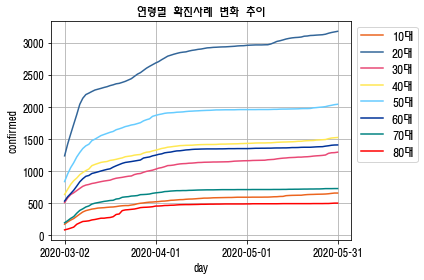

In [5]:
col = ['#34DDDD', '#EC651F', '#336699', '#E94976', '#FFE852', '#66CCFF', '#003399', '#028482', '#FF0000']

fig, ax =plt.subplots()
plt.title('연령별 확진사례 변화 추이')
ax.set_xticks(np.arange(0,150,30))
ax.set_yticks(np.arange(0,5000,500))
ax.plot(A10['date'], A10['confirmed'], label='10대', color=col[1])
ax.plot(A20['date'], A20['confirmed'], label='20대', color=col[2])
ax.plot(A30['date'], A30['confirmed'], label='30대', color=col[3])
ax.plot(A40['date'], A40['confirmed'], label='40대', color=col[4])
ax.plot(A50['date'], A50['confirmed'], label='50대', color=col[5])
ax.plot(A60['date'], A60['confirmed'], label='60대', color=col[6])
ax.plot(A70['date'], A70['confirmed'], label='70대', color=col[7])
ax.plot(A80['date'], A80['confirmed'], label='80대', color=col[8])
ax.set_xlabel('day')
ax.set_ylabel('confirmed')
ax.legend(loc='upper left', fontsize=11, bbox_to_anchor=(1,1))
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
Final_confirmed = (A10.iloc[-1,1],
                   A20.iloc[-1,1],
                   A30.iloc[-1,1],
                   A40.iloc[-1,1],
                   A50.iloc[-1,1],
                   A60.iloc[-1,1],
                   A70.iloc[-1,1],
                   A80.iloc[-1,1])
categories = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']

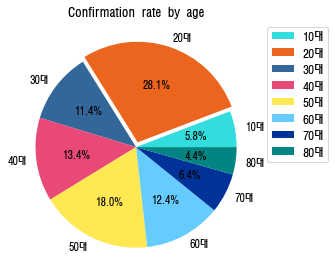

In [7]:
fig, ax =plt.subplots()
plt.title('Confirmation rate by age')
ax.pie(Final_confirmed, colors=col, explode=(0,0.05,0.0,0,0,0,0,0),labels=categories, autopct='%0.1f%%')
ax.legend(categories, loc='upper left', fontsize=11, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.grid('whitegrid')
plt.show()

### 연령별 감염원인 분석

In [9]:
df=pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/covid19/Covid19_dataset/Patientinfo.csv')
print(df.describe())
df.head()

         patient_id    global_num  infection_order
count  4.004000e+03   2806.000000        31.000000
mean   3.220082e+09   7570.577691         2.387097
std    2.169859e+09   3464.522977         1.453213
min    1.000000e+09      1.000000         1.000000
25%    1.100000e+09   5415.500000         1.000000
50%    2.000001e+09   8686.000000         2.000000
75%    6.001000e+09  10351.750000         3.000000
max    7.000000e+09  11499.000000         6.000000


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [10]:
#연령별 데이터 분리
A1 = df.loc[df.age=='10s' ,['age', 'infection_case']]
A2 = df.loc[df.age=='20s' ,['age', 'infection_case']]
A3 = df.loc[df.age=='30s' ,['age', 'infection_case']]
A4 = df.loc[df.age=='40s' ,['age', 'infection_case']]
A5 = df.loc[df.age=='50s' ,['age', 'infection_case']]
A6 = df.loc[df.age=='60s' ,['age', 'infection_case']]
A7 = df.loc[df.age=='70s' ,['age', 'infection_case']]
A8 = df.loc[df.age=='80s' ,['age', 'infection_case']]

In [11]:
#연령별 감염원 사례 수 count 및 sort 하여 상위리스트 5개씩 저장 
case_count_A1 = A1['infection_case'].value_counts(sort=True, ascending=False).head()
case_count_A2 = A2['infection_case'].value_counts(sort=True, ascending=False).head()
case_count_A3 = A3['infection_case'].value_counts(sort=True, ascending=False).head()
case_count_A4 = A4['infection_case'].value_counts(sort=True, ascending=False).head()
case_count_A5 = A5['infection_case'].value_counts(sort=True, ascending=False).head()
case_count_A6 = A6['infection_case'].value_counts(sort=True, ascending=False).head()
case_count_A7 = A7['infection_case'].value_counts(sort=True, ascending=False).head()
case_count_A8 = A8['infection_case'].value_counts(sort=True, ascending=False).head()

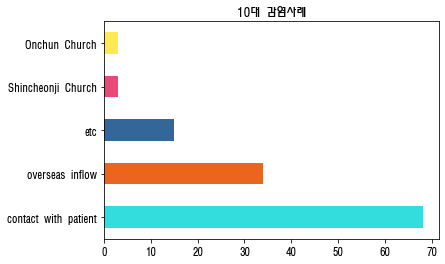

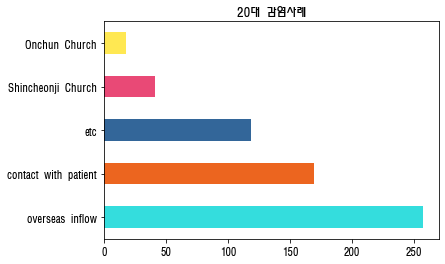

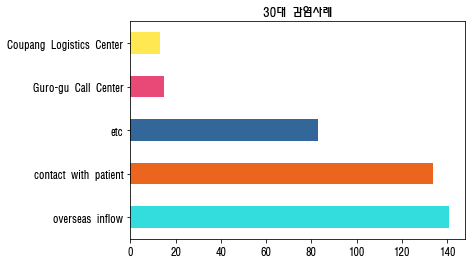

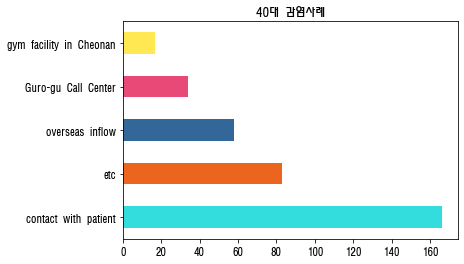

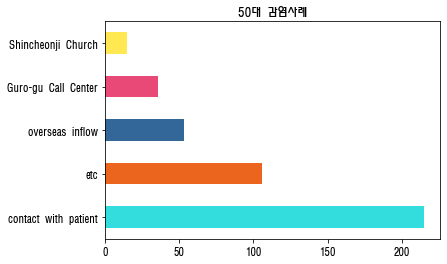

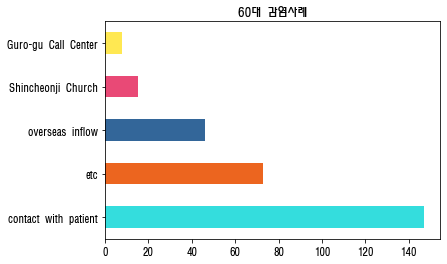

In [12]:

plt.figure()
case_count_A1.plot(kind='barh',color=col, title='10대 감염사례')
plt.figure()
case_count_A2.plot(kind='barh',color=col, title='20대 감염사례')
plt.figure()
case_count_A3.plot(kind='barh',color=col, title='30대 감염사례')
plt.figure()
case_count_A4.plot(kind='barh',color=col, title='40대 감염사례')
plt.figure()
case_count_A5.plot(kind='barh',color=col, title='50대 감염사례')
plt.figure()
case_count_A6.plot(kind='barh',color=col, title='60대 감염사례')
plt.show()